In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta as dt



In [59]:
sales = pd.read_excel("fact_print_sales.xlsx")
revenue = pd.read_csv("fact_ad_revenue.csv")
city = pd.read_excel("dim_city.xlsx")
category = pd.read_excel("dim_ad_category.xlsx")
Readiness = pd.read_csv("fact_city_readiness.csv")
digital = pd.read_csv("fact_digital_pilot.csv")



In [60]:
print(sales.head())

  edition_ID City_ID Language           State                Month  \
0     ED1005    C005    Hindi       Rajasthan  2023-05-01 00:00:00   
1     ED1005    C005    Hindi       Rajasthan  2019-03-01 00:00:00   
2     ED1001    C001    hindi   Uttar pradesh  2023-07-01 00:00:00   
3     ED1003    C003    Hindi  Madhya_Pradesh  2023-07-01 00:00:00   
4     ED1007    C007    Hindi       Jharkhand  2020-10-01 00:00:00   

  Copies Sold  copies_returned  Net_Circulation  
0      404389            13510           390879  
1      492943            25024           467919  
2      168893            12285           156608  
3      216540            10117           206423  
4      234563            13048           221515  


In [61]:
print(sales.describe())

       copies_returned  Net_Circulation
count       720.000000       720.000000
mean      16430.815278    287950.551389
std        6524.459623     83191.491771
min        4991.000000    139098.000000
25%       11379.500000    219982.750000
50%       15151.000000    279778.000000
75%       20902.250000    351736.750000
max       38021.000000    487255.000000


In [62]:
print(sales.columns)

Index(['edition_ID', 'City_ID', 'Language', 'State', 'Month', 'Copies Sold',
       'copies_returned', 'Net_Circulation'],
      dtype='object')


In [63]:
#datatypes of the columns
print(sales.dtypes)

edition_ID         object
City_ID            object
Language           object
State              object
Month              object
Copies Sold        object
copies_returned     int64
Net_Circulation     int64
dtype: object


In [69]:
# converting datatypes of certain columns to string
string_cols = ["edition_ID", "City_ID", "Language", "State", "Month"]
sales[string_cols ] = sales[string_cols].astype("string")



In [85]:
sales['Copies Sold'] = sales['Copies Sold'].astype("string")
sales['Copies Sold'] = sales['Copies Sold'].replace(r'[^0-9]', '', regex=True)
sales['Copies Sold'] = sales['Copies Sold'].replace('', '0')
sales['Copies Sold'] = sales['Copies Sold'].astype("int64")
print(sales.dtypes)

edition_ID         string[python]
City_ID            string[python]
Language           string[python]
State              string[python]
Month                      object
Copies Sold                 int64
copies_returned             int64
Net_Circulation             int64
dtype: object


In [ ]:
#converting the Month column to datetime format

# Step 1: Convert to datetime
sales['Month'] = pd.to_datetime(sales['Month'], errors='coerce')
print(sales.dtypes)




edition_ID         string[python]
City_ID            string[python]
Language           string[python]
State              string[python]
Month              datetime64[ns]
Copies Sold                 int64
copies_returned             int64
Net_Circulation             int64
dtype: object


In [96]:
sales['year'] = sales['Month'].dt.year
#sales['year'] = sales['year'].astype("int64")
sales['year'] = sales['Month'].dt.year.fillna(0).astype("int64")

print(sales.columns)
print(sales.dtypes)

Index(['edition_ID', 'City_ID', 'Language', 'State', 'Month', 'Copies Sold',
       'copies_returned', 'Net_Circulation', 'year'],
      dtype='object')
edition_ID         string[python]
City_ID            string[python]
Language           string[python]
State              string[python]
Month              datetime64[ns]
Copies Sold                 int64
copies_returned             int64
Net_Circulation             int64
year                        int64
dtype: object


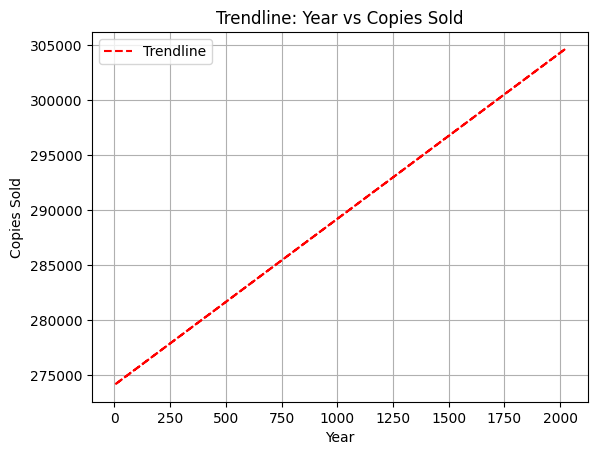

In [100]:
#Print Circulation Trends
x = sales['year']
y = sales['Copies Sold']

# Fit a straight line (best fit)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot ONLY the trendline
plt.plot(x, p(x), "r--", label="Trendline")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Copies Sold")
plt.title("Trendline: Year vs Copies Sold")
plt.legend()
plt.grid(True)
plt.show()